Name : Chathumini B.G.D.T.

Index Number : 190107T

Github Repo:
https://github.com/dulmi-19/Image-Processing-and-Machine-Vision

Question 1

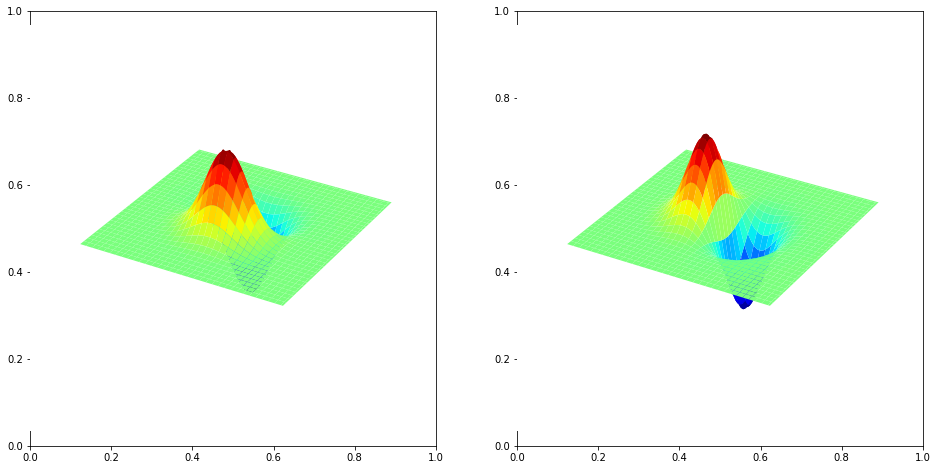

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig,ax =  plt.subplots(1,2,figsize=(16,8))
ax1 = fig.add_subplot(121, projection ='3d')
ax2 = fig.add_subplot(122, projection ='3d')

delta = 0.1
XX,YY = np.meshgrid(np.arange(-5,5 + delta, delta),np.arange(-5,5 + delta,delta))

sigma = 1
g = np.exp(-(XX**2 +YY**2)/(2*sigma**2))
g/= np.sum(g)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
g_x = cv.filter2D(g,-1,sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)
g_y = cv.filter2D(g,-1,sobel_h)

surf1 = ax1.plot_surface(XX,YY,g_x, cmap = cm.jet,linewidth = 0,antialiased = True)
surf1 = ax2.plot_surface(XX,YY,g_y, cmap = cm.jet,linewidth = 0,antialiased = True)

ax1.axis('off')
ax2.axis('off')
plt.show()


Question 2

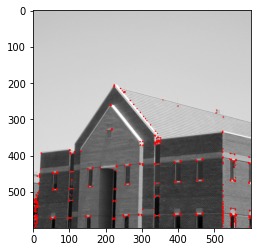

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('building.tif',cv.IMREAD_COLOR)
assert image is not None

gray_im = cv.cvtColor(image,cv.COLOR_BGR2GRAY)  #convert to gray
gray_im = np.float32(gray_im)  #required
dst = cv.cornerHarris(gray_im,2,3,0.04) 

dst = cv.dilate(dst,None) 
image[dst > 0.01*dst.max()]=[255,0,0]  # [R,G,B] color to show edges


 
plt.imshow(image,cmap='gray')
plt.show()


Question 3

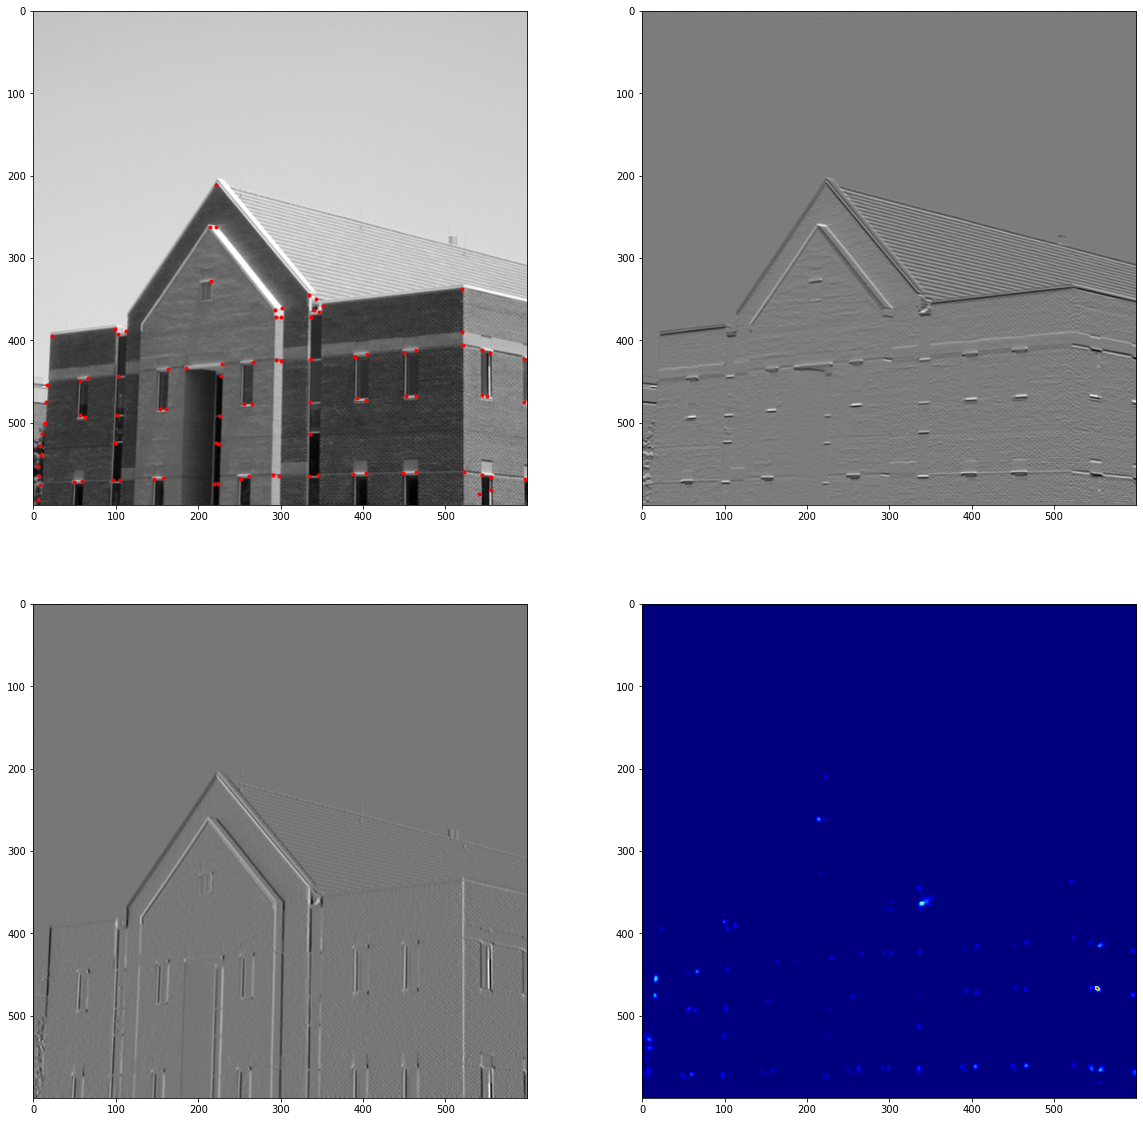

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from matplotlib import cm

image = cv.imread('building.tif',cv.IMREAD_COLOR)
assert image is not None
I = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)

Ix= cv.filter2D(I,-1,sobel_v)
Iy= cv.filter2D(I,-1,sobel_h)

#computing M, matrix
sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix,(ksize, ksize),sigma)
m12 = cv.GaussianBlur(Ix*Iy,(ksize, ksize),sigma)
m21 = m12
m22=cv.GaussianBlur(Iy*Iy,(ksize, ksize),sigma)

det = m11*m22 -m12*m21 #determinent
trace = m11+m22 #add diagonals
alpha = 0.04
R=det-alpha*trace**2
R[R<1e8]=0 #treshold R
cordinates = peak_local_max(R,min_distance = 2)

fig,ax =  plt.subplots(2,2,figsize=(20,20))

ax[0,0].imshow(image,cmap='gray')
ax[0,0].plot(cordinates[:,1],cordinates[:,0],'r.')
ax[0,1].imshow(Ix +127,cmap='gray')
ax[1,0].imshow(Iy +127,cmap='gray')
ax[1,1].imshow(R +127,cmap=cm.jet)
plt.show()



Question 4

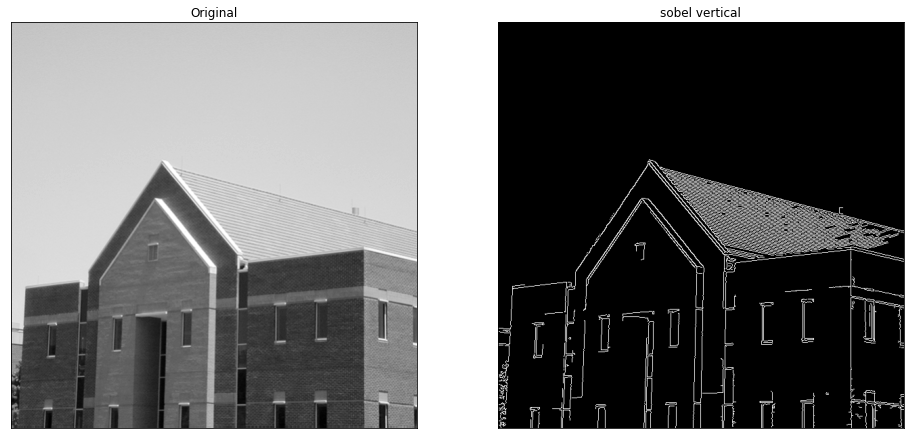

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('building.tif',cv.IMREAD_GRAYSCALE)
assert image is not None

edges = cv.Canny(image,100,200) #cv.Canny(image,low treshold, high treshold)

fig,ax =  plt.subplots(1,2,figsize=(16,8))

ax[0].imshow(image,cmap='gray')
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(edges,cmap='gray')
ax[1].set_title("sobel vertical")
ax[1].set_xticks([]),ax[1].set_yticks([])
plt.show()